# Exploring real Health Care data using Pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../../pandas/data/hospital-costs.csv')

### 1\. Create a new column "Total Charges" using "Discharges" and "Mean Charge".

Answer: The product of series is done element-wise: (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.multiply.html)

In [4]:
df['Total Charges'] = df['Discharges'] * df['Mean Charge']

### 2\. Do the same for the "Total Costs" using "Mean Cost".

In [5]:
df['Total Costs'] = df['Discharges'] * df['Mean Cost']

### 3\. Calculate the charges to costs "markup" rate.

Answer: The division is also done element-wise: (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.divide.html)

In [6]:
df['Markup'] = df['Mean Charge'] / df['Mean Cost'] - 1

### 4\. Which procedure has the highest "markup" rate, and which one has the lowest "markup" rate. 
### (It's always good to do a sanity check, do these results make sense to you?)

Answer: First, let's sort the dataframe by descending values of "markup".  (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Then to display the procedures, we will limit ourselves to just a few columns: `Facility Name`, `APR DRG Description`, `Total Charges`, `Total Costs`, and `Markup`.

In [7]:
markups = df.sort_values(by='Markup', ascending=False)

markups = markups[['Facility Name', 'APR DRG Description',
    'Total Charges', 'Total Costs', 'Markup']]

The procedure with the highest (resp. lowest) markup is in the first (resp. last) row of the new dataframe:

In [8]:
print('procedure with the highest markup:')

markups.head(1)

procedure with the highest markup:


,Facility Name,APR DRG Description,Total Charges,Total Costs,Markup
111925,SUNY Downstate Medical Center at LICH,Neonate Bwt 1500-1999G W Or W/O Other Signific...,43088.0,2068.0,19.83559


In [9]:
print('procedure with the lowest markup:')

markups.tail(1)

procedure with the lowest markup:


,Facility Name,APR DRG Description,Total Charges,Total Costs,Markup
370760,TLC Health Network Tri-County Memorial Hospital,Alcohol & Drug Dependence W Rehab Or Rehab/Det...,1540540.0,97482510.0,-0.984197


### Bonus: What if we want to look at procedures with the highest and lowest averaged markup across facilities?

We would change the line

```python
markups = df.sort_values(by='Markup', ascending=False)
```

to

```python
markups = (df.groupby('Facility Name').mean()
    .sort_values(by='Markup', ascending=False))
```

The rest of the code is unchanged.

## Out of curiosity...

### 1\. What are the top 10 reasons people are going to the hospital for, and how many people did they see?

In [10]:
(df[['APR DRG Description', 'Discharges']]
    .groupby('APR DRG Description')
    .sum()
    .sort_values(by='Discharges', ascending=False)
    .head(10))

,Discharges
APR DRG Description,
"Neonate Birthwt >2499G, Normal Newborn Or Neonate W Other Problem",632412
Vaginal Delivery,458034
Cesarean Delivery,245265
Heart Failure,173826
Other Pneumonia,162344
Septicemia & Disseminated Infections,161739
Chronic Obstructive Pulmonary Disease,146461
Cellulitis & Other Bacterial Skin Infections,124617
Cardiac Arrhythmia & Conduction Disorders,121042


### Now, let's follow the money...

### 1\. Create a new dataframe named "net" that is only the Facility Name, Total Charge, Total Cost from our original dataframe

In [11]:
net = df[['Facility Name', 'Total Charges', 'Total Costs']]

### 2\. Find the total amount each hospital spent, and how much they charged. (Group your data by Facility names, and sum all the total costs and total charges) 

In [12]:
net = net.groupby('Facility Name').sum()

### 3\. Now find the net income for every hospital. Tell me the most profitable and the least profitable ones and how much are they making?  

In [13]:
net['Net Income'] = net['Total Charges'] - net["Total Costs"]

net = net.sort_values(by='Net Income', ascending=False)

In [14]:
print('most profitable:')

net.head(1)

most profitable:


,Total Charges,Total Costs,Net Income
Facility Name,,,
North Shore University Hospital,7.984556e+09,1.933824e+09,6.050732e+09


In [15]:
print('least profitable:')

net.tail(1)

least profitable:


,Total Charges,Total Costs,Net Income
Facility Name,,,
TLC Health Network Tri-County Memorial Hospital,4212448.0,199028516.0,-194816068.0


## Now, let's focus in on *Viral Meningitis*

### 1\. Create a new dataframe that only contains the data corresponding to *Viral Meningitis*

In [16]:
newdf = df[df["APR DRG Description"] == "Viral Meningitis"]

### 2\. Now, with our new dataframe, only keep the data columns we care about which are:  

    `["Facility Name", "APR DRG Description", "APR Severity of Illness Description", "Discharges", "Mean Charge", "Median Charge", "Mean Cost"]`

In [17]:
newdf = newdf[['Facility Name',
    'APR DRG Description', 'APR Severity of Illness Description',
    'Discharges',
    'Mean Charge', 'Median Charge', 'Mean Cost']]

In [18]:
newdf

,Facility Name,APR DRG Description,APR Severity of Illness Description,Discharges,Mean Charge,Median Charge,Mean Cost
24,Adirondack Medical Center-Saranac Lake Site,Viral Meningitis,Minor,1,17116.0,17116.0,7006.0
557,Albany Medical Center Hospital,Viral Meningitis,Minor,19,13212.0,11914.0,4569.0
558,Albany Medical Center Hospital,Viral Meningitis,Moderate,11,21197.0,14197.0,7131.0
559,Albany Medical Center Hospital,Viral Meningitis,Major,6,28074.0,22846.0,7495.0
560,Albany Medical Center Hospital,Viral Meningitis,Extreme,1,130600.0,130600.0,39086.0
...,...,...,...,...,...,...,...
381587,Woodhull Medical & Mental Health Center,Viral Meningitis,Major,3,66690.0,28959.0,57219.0
382350,Wyckoff Heights Medical Center,Viral Meningitis,Minor,7,12588.0,10618.0,5470.0
382351,Wyckoff Heights Medical Center,Viral Meningitis,Moderate,2,7258.0,7258.0,3064.0
382352,Wyckoff Heights Medical Center,Viral Meningitis,Major,1,17336.0,17336.0,5653.0


### 3\. Find which hospital is the least expensive (based on "Mean Charge") for treating Moderate cases of VM.

In [19]:
moderate = newdf[newdf['APR Severity of Illness Description'] == 'Moderate']

(moderate[['Facility Name', 'Mean Charge']]
    .sort_values(by='Mean Charge', ascending=True).head(1))

,Facility Name,Mean Charge
258259,Aurelia Osborn Fox Memorial Hospital,1179.0


### 4\. Find which hospital is the least expensive for treating Moderate cases of VM **that have more than 3 Discharges**.

In [20]:
threeOrMore = moderate[moderate['Discharges'] >= 3]

(threeOrMore[['Facility Name', 'Discharges', 'Mean Charge']]
    .sort_values(by='Mean Charge', ascending=True)).head(1)

,Facility Name,Discharges,Mean Charge
14426,Cayuga Medical Center at Ithaca,6,5738.0


### 5\. Find which hospital discharges the most cases of Viral Meningitis for all levels of severity.

In [21]:
# Step 1. Group all (Viral Meningitis) discharges for each hospital
group = newdf[['Facility Name', 'Discharges']].groupby('Facility Name').sum()

# Step 2. Which hospiptals discharge the most?
group.sort_values(by='Discharges', ascending=False).head(1)

,Discharges
Facility Name,
North Shore University Hospital,158


### 6\. Find if there is a correlation between the severity of illness and the charge.

A boxplot of the mean charge for each severity of illness shows that mean charges tend to increase as severity increases (from minor, to moderate, to major, and then to extreme):

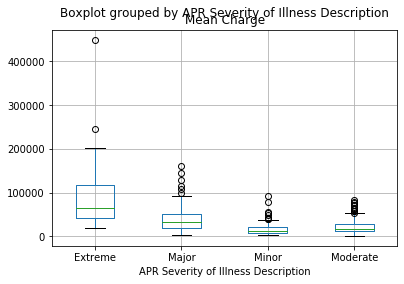

In [22]:
newdf.boxplot('Mean Charge', by='APR Severity of Illness Description')

The correlation is therefore positive.

By default, the grouped columns (extreme, major, minor, and moderate) are sorted alphabetically.  A better graph, would order the column by increased level of severity:

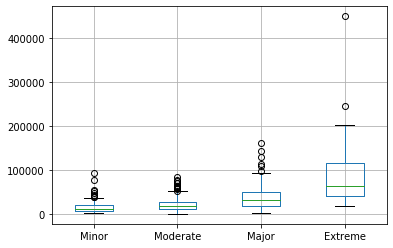

In [23]:
severities = ['Minor', 'Moderate','Major','Extreme']

pd.DataFrame({severity: newdf[newdf['APR Severity of Illness Description'] == severity]['Mean Charge'] for severity in severities},
             columns = severities).boxplot(return_type='axes')

To calculate an actual value for the correlation, one would need to code these levels as numerics, e.g., as equally spaced integers of increasing values.  Note that there is no justification for that particular encoding, making the correlation more dependent on this encoding than any reality of the population. You should then question the statistical meaningfulness of the value you would compute.

In [27]:
# Let's first calculate the mean charge per level of severity
group = (newdf[['APR Severity of Illness Description', 'Mean Charge']]
    .groupby('APR Severity of Illness Description').mean()
    .reset_index())

# Let's then rank order the severity level from minor to extreme
group['APR Severity of Illness'] = (group['APR Severity of Illness Description']
    .map({'Minor': 0, 'Moderate': 1, 'Major': 2, 'Extreme': 3}))

group[['APR Severity of Illness', 'Mean Charge']].corr(method=)

,APR Severity of Illness,Mean Charge
APR Severity of Illness,1.000000,0.921642
Mean Charge,0.921642,1.000000


## Data can be tricky

### 1\. Which illness has the most discharges?

In [25]:
# Step 1. Group illnesses by description and severity
group = (df[['APR DRG Description', 'APR Severity of Illness Description', 'Discharges']]
    .groupby(['APR DRG Description', 'APR Severity of Illness Description'])
    .sum())

# Step 2. Which illness has the most discharges?
group.sort_values(by='Discharges', ascending=False).head(1)

,,Discharges
APR DRG Description,APR Severity of Illness Description,
"Neonate Birthwt >2499G, Normal Newborn Or Neonate W Other Problem",Minor,528921
